# Aplicar PCA (Principal Component Analysis)

É um tipo de modelo que utilizamos para gerar uma redução de dimensionalidade nos dados escolhidos sem perder as caracteristicas com um minimo de perda de informação.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import numpy as np
from pandas import merge
import re
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
df = pd.read_pickle('df_num')
drugbank_df = pd.read_pickle('db_df')

In [4]:
drugbank_all = drugbank_df[
    drugbank_df.molecular_weight.map(lambda x: x is not None) &
    drugbank_df.logP.map(lambda x: x is not None) &
    drugbank_df.logS.map(lambda x: x is not None) &
    drugbank_df.hydrogen_acceptor_count.map(lambda x: x is not None) &
    drugbank_df.hydrogen_donor_count.map(lambda x: x is not None) &
    drugbank_df.rotable_bond_count.map(lambda x: x is not None) &
    drugbank_df.refractivity.map(lambda x: x is not None) &
    drugbank_df.polarizability.map(lambda x: x is not None) &
    drugbank_df.polar_surface_area.map(lambda x: x is not None) &
    drugbank_df.pKa_Acid.map(lambda x: x is not None)& 
    drugbank_df.pKa_Basic.map(lambda x: x is not None) 

]

In [5]:
drugbank_all

,drugbank_id,name,type,groups,categories,molecular_weight,state,water_solubility,melt_point,boil_point,...,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability
5,DB00006,Bivalirudin,small molecule,"[approved, investigational]","[Amino Acids, Peptides, and Proteins, Anticoag...",2180.2853,solid,4.64e-02 g/l,None,None,...,11.88,-4.7,901.57,37,28,66,543.33,215.46,6,0
6,DB00007,Leuprolide,small molecule,"[approved, investigational]","[Adrenal Cortex Hormones, Agents Causing Muscl...",1209.3983,solid,3.38e-02 g/l,150-155,None,...,11.92,-4.6,429.04,16,16,32,327.24,126.8,6,0
13,DB00014,Goserelin,small molecule,[approved],"[Adrenal Cortex Hormones, Amino Acids, Peptide...",1269.4105,solid,2.83e-02 g/l,None,None,...,10.82,-4.6,495.89,18,17,33,325.84,131.22,6,0
33,DB00035,Desmopressin,small molecule,[approved],"[Agents that produce hypertension, Amino Acids...",1069.22,solid,1.10e-01 g/l,None,None,...,11.77,-4,435.41,15,14,19,279.78,104.78,4,0
47,DB00050,Cetrorelix,small molecule,"[approved, investigational]","[Amino Acids, Peptides, and Proteins, Anti-Gon...",1431.038,solid,6.94e-03 g/l,None,None,...,11.79,-5.3,495.67,18,17,38,384.16,148.93,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14290,DB16400,Sibofimloc,small molecule,[investigational],[],649.693,None,4.11e-02 g/l,None,None,...,-3,-4.2,200.61,11,8,6,172.69,70.14,6,0
14293,DB16403,Isoquercitrin,small molecule,[investigational],"[Benzopyrans, Chromones, Flavonoids, Flavonols...",464.379,None,1.66e+00 g/l,None,None,...,-3,-2.4,206.6,12,8,5,109.28,43.32,4,0
14294,DB16404,Carvacrol,small molecule,[experimental],[Terpenes],150.221,None,4.70e-01 g/l,None,None,...,-5.5,-2.5,20.23,1,1,1,47.27,17.86,1,1
14296,DB16406,Subasumstat,small molecule,[investigational],[],578.1,None,4.19e-03 g/l,None,None,...,7.73,-5.1,156.53,9,4,8,147.26,58.69,5,1


In [6]:
selected_columns = drugbank_all[['molecular_weight','logP','logS','pKa_Acid','pKa_Basic','physiological_charge','polar_surface_area','hydrogen_acceptor_count','hydrogen_donor_count','rotable_bond_count','refractivity','polarizability','number_of_rings']]

df_final= selected_columns.copy()

In [7]:
df_final

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings
5,2180.2853,-0.76,-4.7,2.79,11.88,-4.7,901.57,37,28,66,543.33,215.46,6
6,1209.3983,1.04,-4.6,9.49,11.92,-4.6,429.04,16,16,32,327.24,126.8,6
13,1269.4105,0.3,-4.6,9.27,10.82,-4.6,495.89,18,17,33,325.84,131.22,6
33,1069.22,-1,-4,9.5,11.77,-4,435.41,15,14,19,279.78,104.78,4
47,1431.038,1.33,-5.3,9.5,11.79,-5.3,495.67,18,17,38,384.16,148.93,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14290,649.693,0.15,-4.2,12.15,-3,-4.2,200.61,11,8,6,172.69,70.14,6
14293,464.379,0.57,-2.4,6.37,-3,-2.4,206.6,12,8,5,109.28,43.32,4
14294,150.221,3.2,-2.5,10.42,-5.5,-2.5,20.23,1,1,1,47.27,17.86,1
14296,578.1,2.47,-5.1,11.4,7.73,-5.1,156.53,9,4,8,147.26,58.69,5


In [8]:
scaler = StandardScaler()
scaler.fit(df_final)

scaled_data = scaler.transform(df_final)

scaled_data

array([[ 7.56495945, -1.05382582, -0.80057955, ...,  7.32404688,
         7.23939839,  1.80752615],
       [ 3.45048021, -0.29367026, -0.74141985, ...,  3.73672471,
         3.58855104,  1.80752615],
       [ 3.70480327, -0.60617865, -0.74141985, ...,  3.71348323,
         3.7705581 ,  1.80752615],
       ...,
       [-1.0381606 ,  0.61851641,  0.50093385, ..., -0.91107292,
        -0.89738748, -0.99219237],
       [ 0.77512896,  0.3102311 , -1.03721835, ...,  0.74886666,
         0.78391296,  1.24758244],
       [ 0.39141653,  0.43270061, -0.44562135, ...,  0.534049  ,
         0.49731362,  1.24758244]])

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
X2D = pca.fit_transform(df_final)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
pca = PCA(n_components = 2)


principal_components = pca.fit_transform(scaled_data)


principalDf = pd.DataFrame(data = principal_components , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,19.739304,6.638953
1,9.325967,2.007060
2,9.977015,2.606253
3,7.122126,2.704629
4,11.351083,1.979131
...,...,...
8594,2.975956,0.283964
8595,1.264157,1.838924
8596,-2.730971,-0.539730
8597,2.262283,-1.007977


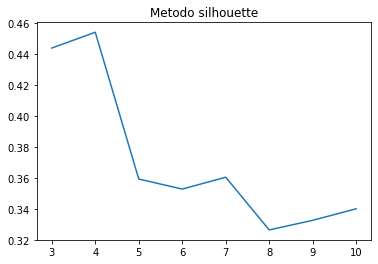

In [11]:
from sklearn.metrics import silhouette_score

aux = []

for i in range(3,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit_predict(principalDf)
    score = silhouette_score(principalDf, kmeans.labels_)
    aux.append(score)

plt.plot(range(3,11), aux)
plt.title('Metodo silhouette')


plt.show()

In [12]:
pca.explained_variance_ratio_

array([0.48025368, 0.26514023])

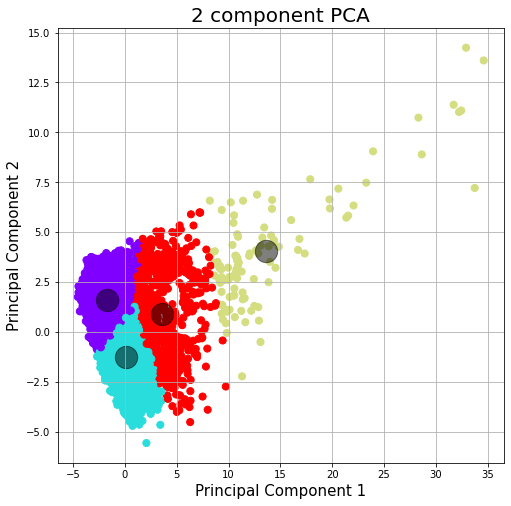

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


k = 4
kmeans2 = KMeans(n_clusters=k)
y_pred = kmeans2.fit_predict(principalDf)
kmeans2.cluster_centers_


plt.scatter(principalDf.loc[:,'principal component 1'], principalDf.loc[:,'principal component 2'], c=y_pred, s=50, cmap='rainbow')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=500, alpha=0.5)



ax.grid()

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

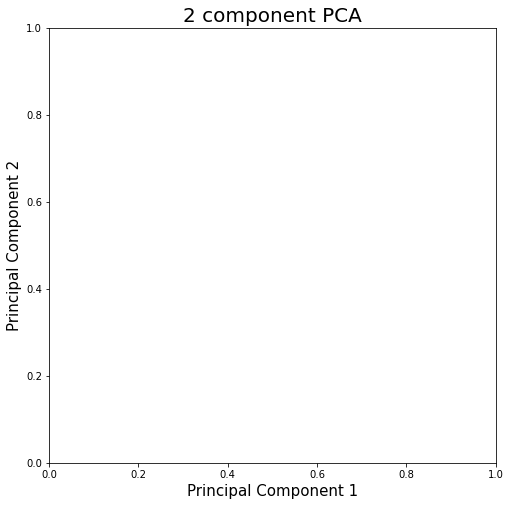

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


k = 4
kmeans2 = KMeans(n_clusters=k)
y_pred = kmeans2.fit_predict(X2D)
kmeans2.cluster_centers_


plt.scatter(X2D.loc[:,'principal component 1'], X2D.loc[:,'principal component 2'], c=y_pred, s=50, cmap='rainbow')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=500, alpha=0.5)



ax.grid()

In [14]:
dfcluster = pd.DataFrame(y_pred)

drugbank_df["cluster"] = dfcluster

df_final["cluster"] = dfcluster

In [15]:
grupo1 = df_final[df_final.cluster == 0]

grupo2 = df_final[df_final.cluster == 1]

grupo3 = df_final[df_final.cluster == 2]

grupo4 = df_final[df_final.cluster == 3]

In [16]:
def lipinski(grupo):
    lipinskado = grupo[(grupo['molecular_weight'] <= 500) & (grupo['logP'] <= 5) & (grupo['hydrogen_acceptor_count'] <= 10) & (grupo['hydrogen_donor_count'] <= 5)]
    return lipinskado

In [17]:
grupo1

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,cluster
13,1269.4105,0.3,-4.6,9.27,10.82,-4.6,495.89,18,17,33,325.84,131.22,6,0.0
33,1069.22,-1,-4,9.5,11.77,-4,435.41,15,14,19,279.78,104.78,4,0.0
47,1431.038,1.33,-5.3,9.5,11.79,-5.3,495.67,18,17,38,384.16,148.93,6,0.0
97,1416.09,2.84,-5.6,9.47,10.66,-5.6,424.98,16,13,38,373.91,149.31,6,0.0
105,247.1419,-0.55,-1.6,1.68,4.11,-1.6,116.95,6,3,4,54.75,20.9,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,362.3837,-2.3,-1.9,11.15,6.74,-1.9,150.28,5,4,6,89.76,35.13,3,0.0
8393,501.23,0.11,-2,1.95,8.82,-2,204.71,13,2,16,118.96,34.91,0,0.0
8402,150.0868,-1.3,0.03,2.72,-4.3,0.03,115.06,6,4,3,26.21,11.33,0,0.0
8408,348.3936,-0.09,-2.6,3.13,7.83,-2.6,106.94,6,3,8,90.06,35.82,2,0.0


In [18]:
grupo2

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,cluster
63,2140.46,-1.4,-3.9,7.65,11.5,-3.9,463.93,16,14,38,272.59,108.29,8,1.0
74,1620.693,-0.47,-5,2.98,9.59,-5,702.02,27,22,35,393.57,158.96,4,1.0
95,1019.25,0.42,-4.9,11.4,10.17,-4.9,332.22,12,13,17,269.77,107.65,5,1.0
106,1355.3652,2.66,-4.8,1.82,8.68,-4.8,477.85,18,9,27,337.48,138.79,8,1.0
110,88.0621,-0.38,0.18,2.93,-9.6,0.18,54.37,3,1,1,17.99,7.31,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8437,562.69,0.37,-5,-1,-5,-5,142.88,8,2,6,143.56,59.64,5,1.0
8442,152.1473,2.07,-1.4,9.72,-4.3,-1.4,46.53,2,1,2,40.06,14.98,1,1.0
8448,216.036,-1.4,-0.42,1.51,-3,-0.42,112.88,5,2,4,29.15,12.87,0,1.0
8449,103.173,-3.6,-1.6,13.97,-3.2,-1.6,20.23,1,1,2,42.19,12.57,0,1.0


In [19]:
grupo3

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,cluster
5,2180.2853,-0.76,-4.7,2.79,11.88,-4.7,901.57,37,28,66,543.33,215.46,6,2.0
6,1209.3983,1.04,-4.6,9.49,11.92,-4.6,429.04,16,16,32,327.24,126.8,6,2.0
209,567.782,4.61,-5.5,9.32,8.18,-5.5,101.9,5,4,10,162.67,63.8,4,2.0
308,517.555,0.67,-3.6,3.49,-4.3,-3.6,156.43,7,3,6,126.3,51.77,4,2.0
852,260.308,3.16,-3.8,4.01,-7.8,-3.8,54.37,3,1,4,69.41,26.84,2,2.0
1732,152.235,-0.44,-0.33,13.48,-3.3,-0.33,40.46,2,2,0,37.27,14.2,1,2.0
1734,629.7425,1.63,-4.9,11.4,7.78,-4.9,152.37,8,5,13,171.92,67.9,6,2.0
1807,283.3052,0.69,-3.6,9.08,10.59,-3.6,109.75,4,4,3,100.99,30.73,3,2.0
1898,86.0925,-1.2,0.45,16.27,3.2,0.45,69.11,2,2,1,22.74,8.13,0,2.0
2384,168.042,-1.9,-0.95,1.64,-10,-0.95,111.9,6,3,3,28.98,11.91,0,2.0


In [20]:
grupo4

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,cluster
86,1040.219,-1.1,-4.4,11.39,10.18,-4.4,405.32,13,12,19,264.79,103.93,4,3.0
123,105.0926,-3.4,0.66,2.03,8.93,0.66,83.55,4,3,2,22.04,9.39,0,3.0
131,221.2078,-2.1,-0.18,11.56,-1.2,-0.18,127.09,6,5,6,48.45,20.49,0,3.0
140,204.2252,-1.1,-2.2,2.54,9.4,-2.2,79.11,3,3,3,56.2,21.05,2,3.0
145,175.1857,-3.3,-0.9,2.27,9.23,-0.9,118.44,4,4,5,41.33,17.35,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,298.426,2.6,-4.5,16.21,-1.7,-4.5,37.3,2,1,0,87.18,34.79,4,3.0
8366,378.44,1.3,-3.2,12.58,-2.9,-3.2,94.83,5,3,2,98.32,38.9,4,3.0
8371,372.461,2.09,-3.7,12.44,-3.3,-3.7,91.67,5,2,2,102.04,40.19,4,3.0
8431,124.1372,1.31,-0.54,9.94,-4.8,-0.54,29.46,2,1,1,34.5,12.76,1,3.0


In [21]:
g1lip = lipinski(grupo1)
g2lip = lipinski(grupo2)
g3lip =lipinski(grupo3)
g4lip =lipinski(grupo4)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
aceitoslipinski= pd.concat([g1lip,g2lip,g3lip,g4lip])

aceitoslipinski.cluster.value_counts()

NameError: name 'g1lip' is not defined